## Used Cars Price Prediction
Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included: autos.csv:

* dateCrawled : when this ad was first crawled, all field-values are taken from this date
* name : "name" of the car
seller : private or dealer
offerType
price : the price on the ad to sell the car
abtest
vehicleType
yearOfRegistration : at which year the car was first registered
gearbox
powerPS : power of the car in PS
model
kilometer : how many kilometers the car has driven
monthOfRegistration : at which month the car was first registered
fuelType
brand
notRepairedDamage : if the car has a damage which is not repaired yet
dateCreated : the date for which the ad at ebay was created
nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
postalCode
lastSeenOnline : when the crawler saw this ad last online
The fields lastSeen and dateCreated could be used to estimate how long a car will be at least online before it is sold.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('userCarsDataset.csv',encoding='cp1252')
df.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,5,6,8,10,11,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-16 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-16 0:00,0.0,70435.0,07-04-16 3:16
1,24-03-16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-16 0:00,0.0,66954.0,07-04-16 1:46
2,14-03-16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-16 0:00,0.0,90480.0,05-04-16 12:47
3,17-03-16 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-16 0:00,0.0,91074.0,17-03-16 17:40
4,31-03-16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-16 0:00,0.0,60437.0,06-04-16 10:17


## 1. Investing the Dataset

#### checking for null values

In [2]:
df.isnull().sum()

dateCrawled            103701
name                   103701
seller                 103702
offerType              103702
price                  103702
abtest                 103702
vehicleType            131029
yearOfRegistration     103703
gearbox                118231
powerPS                103702
model                  118576
kilometer              103702
monthOfRegistration    103703
fuelType               127799
brand                  103703
notRepairedDamage      155716
dateCreated            103703
nrOfPictures           103703
postalCode             103703
lastSeen               103703
dtype: int64

In [7]:
df.shape

(371539, 20)

In [8]:
df1 = df.copy()

#### checking for duplicates

In [9]:
df2 = df1.drop_duplicates()
df2.shape

(267802, 20)

#### checking for null values after removing duplicate records

In [6]:
df2.isnull().sum()

dateCrawled                1
name                       1
seller                     2
offerType                  2
price                      2
abtest                     2
vehicleType            27328
yearOfRegistration         3
gearbox                14531
powerPS                    2
model                  14875
kilometer                  2
monthOfRegistration        3
fuelType               24097
brand                      3
notRepairedDamage      52011
dateCreated                3
nrOfPictures               3
postalCode                 3
lastSeen                   3
dtype: int64

In [6]:
df2.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer               object
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object

#### checking value counts of categorical columns

##### a. offerType

In [11]:
df2.offerType.value_counts()

Angebot    267792
Gesuch          7
150000          1
Name: offerType, dtype: int64

##### Inference
* We can see this column is highly biased, so we would delete rows of offertype Gesuch and 150000 and then delete this column.
* Note that having 150000 in offer type is a bit strange. Let's see that particular record

In [12]:
df2[df2['offerType'] == '150000']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
142236,ell,90,golf,150000,4.0,benzin,volkswagen,NaN,25-03-16 0:00,0.0,48429,30-03-16 0:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2 = df2.loc[((df2['offerType'] != 'Gesuch') & (df2['offerType'] != '150000')),:]
df2.offerType.value_counts()

Angebot    267792
Name: offerType, dtype: int64

##### b. seller

In [14]:
df2.seller.value_counts()

privat        267789
gewerblich         3
Name: seller, dtype: int64

##### Inference
* We can see this column is highly biased, so we would delete rows of seller belonging to gewerblich and then delete this column

In [15]:
df2 = df2[(df2.seller != 'gewerblich')]
df2.seller.value_counts()

privat    267789
Name: seller, dtype: int64

##### c. abtest

In [16]:
df2.abtest.value_counts()

test       138959
control    128830
Name: abtest, dtype: int64

##### Inference
* This column has 2 levels each of which looks to have equal number of records. no cleaning required.

##### d. vehicleType

In [17]:
df2.vehicleType.value_counts()

limousine     69107
kleinwagen    57745
kombi         48547
bus           21738
cabrio        16661
coupe         13682
suv           10558
andere         2429
Name: vehicleType, dtype: int64

##### e. gearbox

In [18]:
df2['gearbox'].value_counts()

manuell      197682
automatik     55582
Name: gearbox, dtype: int64

##### f. model

In [19]:
df2['model'].value_counts()

golf                  21617
andere                19080
3er                   14848
polo                   9485
corsa                  9021
astra                  7775
passat                 7472
a4                     7376
c_klasse               6359
5er                    6136
e_klasse               5460
a3                     4764
a6                     4327
focus                  4225
fiesta                 4180
transporter            3950
twingo                 3567
2_reihe                3512
a_klasse               3121
fortwo                 3098
vectra                 3068
1er                    2822
mondeo                 2576
clio                   2575
3_reihe                2541
touran                 2539
punto                  2393
zafira                 2166
megane                 2089
ka                     1950
                      ...  
mii                      60
lanos                    60
range_rover_evoque       50
nubira                   43
crossfire           

##### g. kilometer

In [19]:
df2['kilometer'].value_counts() 

150000    151904
125000     24098
150000     21365
100000     10140
90000       7948
80000       6990
70000       6246
60000       5517
50000       4865
5000        4437
40000       4071
30000       3886
20000       3653
125000      3394
100000      1403
10000       1271
90000       1067
80000        999
70000        819
60000        759
50000        639
5000         627
40000        536
30000        511
20000        471
10000        173
Name: kilometer, dtype: int64

##### h. brand

In [20]:
df2['brand'].value_counts() 

volkswagen        57361
bmw               29179
opel              28823
mercedes_benz     25482
audi              23656
ford              18394
renault           12953
peugeot            7970
fiat               6980
seat               5046
mazda              4135
skoda              4038
citroen            3763
smart              3744
nissan             3648
toyota             3362
sonstige_autos     2883
hyundai            2634
mini               2450
volvo              2412
mitsubishi         2222
honda              2009
kia                1827
suzuki             1707
alfa_romeo         1662
porsche            1621
chevrolet          1334
chrysler           1031
dacia               665
jeep                584
daihatsu            582
land_rover          552
subaru              549
jaguar              465
trabant             429
daewoo              387
saab                378
rover               360
lancia              354
lada                158
Name: brand, dtype: int64

##### i. fuelType

In [21]:
df2['fuelType'].value_counts() 

benzin     161459
diesel      77604
lpg          3782
cng           422
hybrid        195
andere        157
elektro        80
Name: fuelType, dtype: int64

##### j. notRepairedDamage

In [22]:
df2.notRepairedDamage.value_counts()

nein    189708
ja       26078
Name: notRepairedDamage, dtype: int64

##### k. nrOfPictures

In [23]:
df2.nrOfPictures.value_counts()

0.0    267789
Name: nrOfPictures, dtype: int64

#### Dropping Rows with NAs for categorical columns and Columns of less importance

In [97]:
df3 = df2.copy()

In [98]:
df3.isnull().sum()

dateCrawled                1
name                       1
seller                     2
offerType                  2
price                      2
abtest                     2
vehicleType            27324
yearOfRegistration         2
gearbox                14527
powerPS                    2
model                  14874
kilometer                  2
monthOfRegistration        2
fuelType               24092
brand                      2
notRepairedDamage      52005
dateCreated                2
nrOfPictures               2
postalCode                 2
lastSeen                   2
dtype: int64

##### Deleting rows with NaN - which have less number of NaN

In [99]:
df3 = df3.dropna(subset=['seller','abtest','offerType','price','yearOfRegistration'],axis=0)
df3.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            27322
yearOfRegistration         0
gearbox                14525
powerPS                    0
model                  14872
kilometer                  0
monthOfRegistration        0
fuelType               24090
brand                      0
notRepairedDamage      52003
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [28]:
df3.shape

(267789, 20)

## Binning

1. Postal Code

In [37]:
df3.postalCode.dtype

dtype('float64')

In [42]:
df3.postalCode.max()

99998.0

In [43]:
df3.postalCode.min()

1067.0

In [100]:
bins = [0, 10000, 20000, 30000, 40000, 50000,60000,70000,80000,90000,np.inf]
names = ['1', '2', '3', '4', '5','6','7','8','9','10']

df3['postalCode_bin'] = pd.cut(df3['postalCode'], bins, labels=names,right=True,include_lowest=True)

In [49]:
df3.postalCode_bin.value_counts()

5     36930
6     34977
4     32965
3     31675
7     26499
9     25140
8     24433
10    21219
2     20458
1     13493
Name: postalCode_bin, dtype: int64

2. Model (since it has large number of factor)

In [50]:
df3.model.value_counts()

golf                  21617
andere                19080
3er                   14848
polo                   9485
corsa                  9021
astra                  7775
passat                 7472
a4                     7376
c_klasse               6359
5er                    6136
e_klasse               5460
a3                     4764
a6                     4327
focus                  4225
fiesta                 4180
transporter            3950
twingo                 3567
2_reihe                3512
a_klasse               3121
fortwo                 3098
vectra                 3068
1er                    2822
mondeo                 2576
clio                   2575
3_reihe                2541
touran                 2539
punto                  2393
zafira                 2166
megane                 2089
ka                     1950
                      ...  
mii                      60
lanos                    60
range_rover_evoque       50
nubira                   43
crossfire           

In [101]:
model_dict = {}
model_dict = df3.model.value_counts()
popular_models = [key for key,value in model_dict.items() if value > 3000]

In [102]:
df3['model_bin'] = [x if x in popular_models else 'other' for x in df3['model']]
df3['model_bin'].value_counts()

other          115348
golf            21617
andere          19080
3er             14848
polo             9485
corsa            9021
astra            7775
passat           7472
a4               7376
c_klasse         6359
5er              6136
e_klasse         5460
a3               4764
a6               4327
focus            4225
fiesta           4180
transporter      3950
twingo           3567
2_reihe          3512
a_klasse         3121
fortwo           3098
vectra           3068
Name: model_bin, dtype: int64

3.Brand

In [103]:
brand_dict = {}
brand_dict = df3.brand.value_counts()
popular_brands = [key for key,value in brand_dict.items() if value > 2500]
df3['brand_bin'] = [x if x in popular_brands else 'other' for x in df3['brand']]
df3['brand_bin'].value_counts()

volkswagen        57361
bmw               29179
opel              28823
mercedes_benz     25482
other             23738
audi              23656
ford              18394
renault           12953
peugeot            7970
fiat               6980
seat               5046
mazda              4135
skoda              4038
citroen            3763
smart              3744
nissan             3648
toyota             3362
sonstige_autos     2883
hyundai            2634
Name: brand_bin, dtype: int64

In [91]:
df3.shape

(267789, 26)

In [87]:
df3.yearOfRegistration.value_counts()

2000.0    17734
1999.0    16225
2005.0    16141
2006.0    14588
2001.0    14536
2003.0    14325
2004.0    14135
2002.0    13775
1998.0    12885
2007.0    12724
2008.0    11690
2009.0    11227
1997.0    10612
2010.0     8935
2011.0     8733
1996.0     7892
2017.0     7564
2016.0     7136
1995.0     7039
2012.0     6776
2013.0     4461
1994.0     3558
2014.0     3503
2018.0     2865
1993.0     2459
2015.0     2176
1992.0     2158
1990.0     2097
1991.0     2071
1989.0      960
          ...  
9450.0        1
4800.0        1
1200.0        1
8500.0        1
2066.0        1
2800.0        1
9996.0        1
5600.0        1
5300.0        1
5555.0        1
7777.0        1
1944.0        1
1939.0        1
1927.0        1
1925.0        1
1919.0        1
1911.0        1
3800.0        1
7500.0        1
3700.0        1
1001.0        1
1688.0        1
6500.0        1
3200.0        1
6200.0        1
5911.0        1
5900.0        1
2900.0        1
1400.0        1
4100.0        1
Name: yearOfRegistration

In [139]:
df3 = df3[(df3.yearOfRegistration > 1984) & (df3.yearOfRegistration < 2019)]
df3.shape

(263161, 26)

In [140]:
df3.yearOfRegistration.value_counts()

2000.0    17734
1999.0    16225
2005.0    16141
2006.0    14588
2001.0    14536
2003.0    14325
2004.0    14135
2002.0    13775
1998.0    12885
2007.0    12724
2008.0    11690
2009.0    11227
1997.0    10612
2010.0     8935
2011.0     8733
1996.0     7892
2017.0     7564
2016.0     7136
1995.0     7039
2012.0     6776
2013.0     4461
1994.0     3558
2014.0     3503
2018.0     2865
1993.0     2459
2015.0     2176
1992.0     2158
1990.0     2097
1991.0     2071
1989.0      960
1988.0      702
1985.0      562
1987.0      512
1986.0      405
Name: yearOfRegistration, dtype: int64

* We can see there are some strange values for year ie 2500 , 5555 , 6200 etc. We would remove these rows rather than imputing them with some random number

## Feature Engineering

In [105]:
print(df3.lastSeen.dtype)
print(df3.lastSeen.head())

object
0     07-04-16 3:16
1     07-04-16 1:46
2    05-04-16 12:47
3    17-03-16 17:40
4    06-04-16 10:17
Name: lastSeen, dtype: object


In [106]:
df3.dateCreated.dtype
print(df3.dateCreated.head())

0    24-03-16 0:00
1    24-03-16 0:00
2    14-03-16 0:00
3    17-03-16 0:00
4    31-03-16 0:00
Name: dateCreated, dtype: object


In [107]:
new = df3['lastSeen'].str.split(" ",n=1,expand=True)
new[0].head()

0    07-04-16
1    07-04-16
2    05-04-16
3    17-03-16
4    06-04-16
Name: 0, dtype: object

In [108]:
df3['lastSeen_Date'] = new[0]
df3.lastSeen_Date = pd.to_datetime(df3.lastSeen_Date,infer_datetime_format=True)
df3.lastSeen_Date.head()

0   2016-07-04
1   2016-07-04
2   2016-05-04
3   2016-03-17
4   2016-06-04
Name: lastSeen_Date, dtype: datetime64[ns]

In [109]:
new = df3['dateCreated'].str.split(" ",n=1,expand=True)
df3['dateCreated_Date'] = new[0]
df3.dateCreated_Date = pd.to_datetime(df3.dateCreated_Date,infer_datetime_format=True)
df3.dateCreated_Date.head()

0   2016-03-24
1   2016-03-24
2   2016-03-14
3   2016-03-17
4   2016-03-31
Name: dateCreated_Date, dtype: datetime64[ns]

In [110]:
df3['Num_of_days'] = df3['lastSeen_Date'] - df3['dateCreated_Date']
df3['Num_of_days'].head()

0   102 days
1   102 days
2    51 days
3     0 days
4    65 days
Name: Num_of_days, dtype: timedelta64[ns]

In [111]:
df3['Num_of_days'] = df3['Num_of_days'].astype(str)

In [112]:
df3['Num_of_days'].head()

0    102 days 00:00:00.000000000
1    102 days 00:00:00.000000000
2     51 days 00:00:00.000000000
3      0 days 00:00:00.000000000
4     65 days 00:00:00.000000000
Name: Num_of_days, dtype: object

In [113]:
new = df3['Num_of_days'].str.split(" ",n=3,expand=True)
print(new.head())
df3['Num_of_days'] = new[0]
df3['Num_of_days'].head()

     0     1                   2
0  102  days  00:00:00.000000000
1  102  days  00:00:00.000000000
2   51  days  00:00:00.000000000
3    0  days  00:00:00.000000000
4   65  days  00:00:00.000000000


0    102
1    102
2     51
3      0
4     65
Name: Num_of_days, dtype: object

In [114]:
df3['Num_of_days'] = df3['Num_of_days'].astype(int)
df3['Num_of_days'].head()

0    102
1    102
2     51
3      0
4     65
Name: Num_of_days, dtype: int32

##### Dropping columns 
* Deleting columns which have only 1 level and Date columns 
* Deleting name, model, postal code as these will end up generating too many columns during OHE

lastSeen','postalCode','dateCrawled','dateCreated','model'

df4 = df3.drop(['seller','offerType','lastSeen','postalCode','dateCrawled','nrOfPictures','dateCreated','name','model'],axis=1)
df4.columns

In [234]:
df4 = df3.drop(['lastSeen','postalCode','dateCrawled','nrOfPictures','dateCreated','name','model','monthOfRegistration','dateCreated_Date','lastSeen_Date','brand'],axis=1)
df4.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'fuelType',
       'notRepairedDamage', 'postalCode_bin', 'model_bin', 'brand_bin',
       'Num_of_days'],
      dtype='object')

##### Imputing NA's of categorical Column with Not-Known Category

In [142]:
df4.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType           26625
yearOfRegistration        0
gearbox               13574
powerPS                   0
kilometer                 0
fuelType              23120
notRepairedDamage     50506
postalCode_bin            0
model_bin                 0
brand_bin                 0
Num_of_days               0
dtype: int64

In [30]:
df4.shape

(267789, 11)

In [235]:
df4['notRepairedDamage'].fillna(value='NotKnown',inplace=True)
df4['vehicleType'].fillna(value='NotKnown',inplace=True)
df4['gearbox'].fillna(value='NotKnown',inplace=True)
df4['fuelType'].fillna(value='NotKnown',inplace=True)

In [144]:
df4.isnull().sum()

seller                0
offerType             0
price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
kilometer             0
fuelType              0
notRepairedDamage     0
postalCode_bin        0
model_bin             0
brand_bin             0
Num_of_days           0
dtype: int64

#### Numerical Columns

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Price

Text(0.5, 0, 'Box Plot of Price')

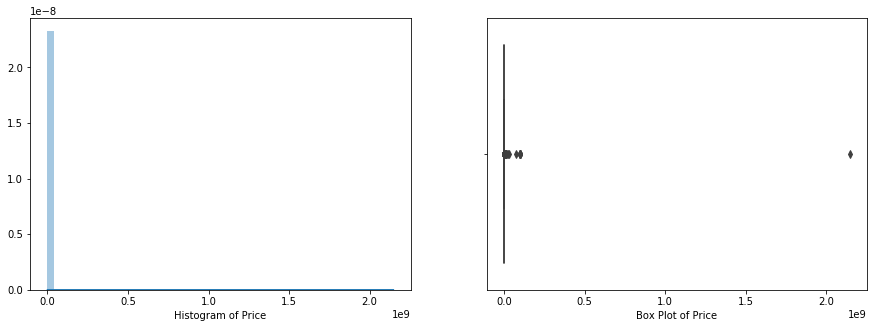

In [145]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = axes.flatten()
g = sns.distplot(df4['price'],ax=ax1)
g.set_xlabel('Histogram of Price')
g2 = sns.boxplot(df4['price'],ax=ax2)
g2.set_xlabel('Box Plot of Price')

In [121]:
df4['price'].describe()

count    2.632640e+05
mean     1.878502e+04
std      4.234437e+06
min      0.000000e+00
25%      1.111000e+03
50%      2.910500e+03
75%      7.000000e+03
max      2.147484e+09
Name: price, dtype: float64

##### Inference
* There are rows with price 0. These row are suspicious since price cannot be zero. We will delete such rows.
* We can see that there is a large gap in the 75th percentile and the max price. We will delete such extreme rows since they will impact our coefficients. 
* As visible in the box plot we can see that there is only 1 extreme value of 2.147484e+09 . We will delete this row

In [236]:
max_price = df4['price'].max()
df4 = df4.loc[~(df4['price'] ==max_price),:]
df4.shape

(263160, 15)

In [147]:
# A car cannot have a 0 price. Hence we will delete such rows.
df4[df4['price'] == 0].count()

seller                7451
offerType             7451
price                 7451
abtest                7451
vehicleType           7451
yearOfRegistration    7451
gearbox               7451
powerPS               7451
kilometer             7451
fuelType              7451
notRepairedDamage     7451
postalCode_bin        7451
model_bin             7451
brand_bin             7451
Num_of_days           7451
dtype: int64

#### Deleting rows with 0 price

In [237]:
df4 = df4[df4['price'] != 0]
df4.shape

(255709, 15)

In [149]:
df4.loc[df4.price < 250].count() #250 Euro  = 20000

seller                6464
offerType             6464
price                 6464
abtest                6464
vehicleType           6464
yearOfRegistration    6464
gearbox               6464
powerPS               6464
kilometer             6464
fuelType              6464
notRepairedDamage     6464
postalCode_bin        6464
model_bin             6464
brand_bin             6464
Num_of_days           6464
dtype: int64

In [238]:
df4 = df4[df4['price'] > 250]
df4.shape

(247652, 15)

##### Outlier Removal in  Price column

In [239]:
Q1 = df4['price'].quantile(0.25)
Q3 = df4['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6150.0


In [153]:
((df4['price'] < (Q1 - 1.5 * IQR)) | (df4['price'] > (Q3 + 1.5 * IQR))).sum()

18563

In [154]:
df4.shape

(247652, 15)

In [240]:
df5 = df4.loc[~((df4['price'] < (Q1 - 1.5 * IQR)) | (df4['price'] > (Q3 + 1.5 * IQR))),:]
df5.shape

(229089, 15)

Text(0.5, 0, 'Box Plot of Price')

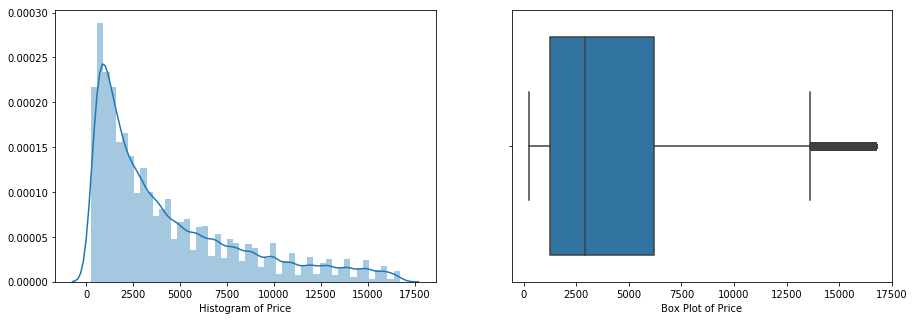

In [156]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = axes.flatten()
g = sns.distplot(df5['price'],ax=ax1)
g.set_xlabel('Histogram of Price')
g2 = sns.boxplot(df5['price'],ax=ax2)
g2.set_xlabel('Box Plot of Price')

##### Inference
* We can see how removing outliers resulted in a better distribution of the Price

##### 2. yearOfRegistration

In [157]:
df5['yearOfRegistration'].value_counts()

2000.0    15495
2005.0    15244
1999.0    15001
2003.0    13939
2006.0    13931
2001.0    13861
2004.0    13730
2002.0    13281
2007.0    11812
1998.0    11546
2008.0    10417
2009.0     9680
1997.0     9166
2010.0     6905
2017.0     6867
1996.0     6792
2011.0     6055
2016.0     5800
1995.0     5567
2012.0     4158
1994.0     3041
2018.0     2669
2013.0     2264
1993.0     2078
1992.0     1846
1991.0     1779
1990.0     1619
2014.0     1300
1989.0      835
1988.0      638
2015.0      579
1987.0      433
1985.0      428
1986.0      333
Name: yearOfRegistration, dtype: int64

In [158]:
df5.shape

(229089, 15)

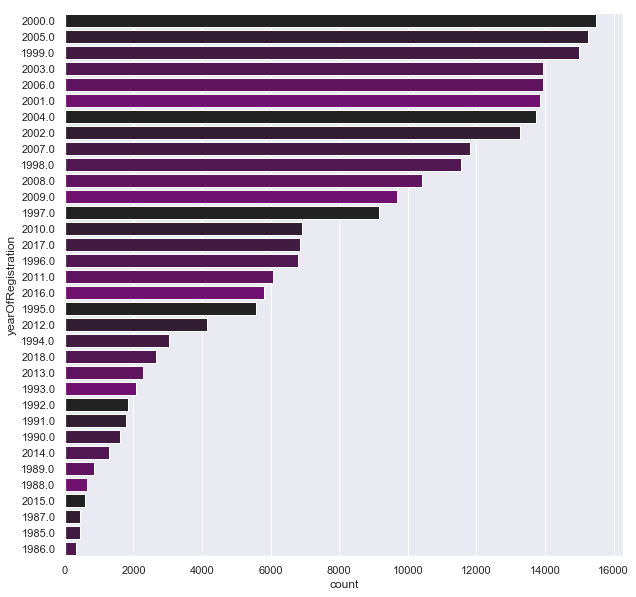

In [167]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y=df5['yearOfRegistration'],palette=sns.dark_palette("purple"),order=df5['yearOfRegistration'].value_counts().sort_values(ascending=False).index)

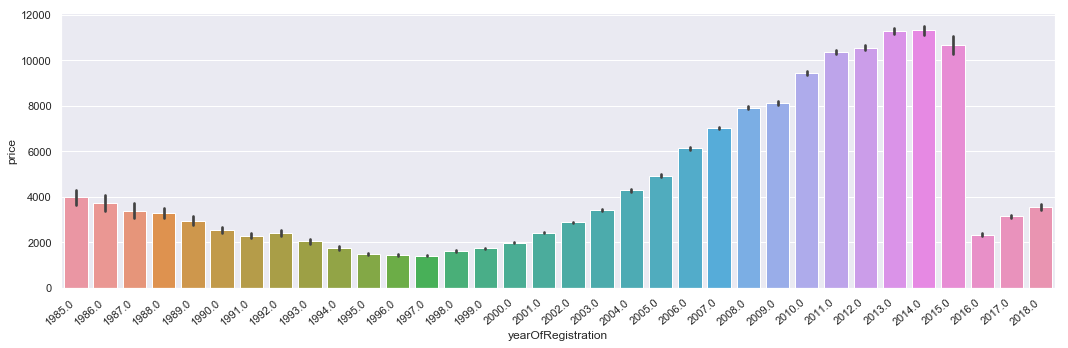

In [174]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(y=df5['price'],x=df5['yearOfRegistration'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### Inference
* We can see the trend in the price is increasing from 1999

##### 3. powerPS

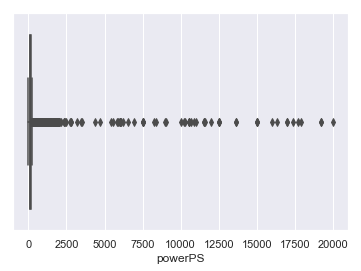

In [175]:
sns.boxplot(df5['powerPS'])

In [176]:
df5['powerPS'].describe()

count    229089.000000
mean        111.202079
std         191.446780
min           0.000000
25%          73.000000
50%         105.000000
75%         140.000000
max       20000.000000
Name: powerPS, dtype: float64

In [178]:
# Checking for number of rows which have 0 powerPS
df5[df5['powerPS'] == 0]

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode_bin,model_bin,brand_bin,Num_of_days
0,privat,Angebot,480.0,test,Not-Known,1993.0,manuell,0.0,150000,benzin,Not-Known,8,golf,volkswagen,102
37,privat,Angebot,1500.0,test,Not-Known,2016.0,Not-Known,0.0,150000,diesel,nein,5,other,renault,2
54,privat,Angebot,4700.0,control,kombi,2005.0,manuell,0.0,150000,Not-Known,nein,9,other,opel,18
55,privat,Angebot,550.0,test,kombi,1999.0,manuell,0.0,150000,diesel,ja,6,astra,opel,-82
70,privat,Angebot,1200.0,test,coupe,2001.0,Not-Known,0.0,150000,Not-Known,Not-Known,5,astra,opel,182
71,privat,Angebot,800.0,control,kleinwagen,1993.0,manuell,0.0,150000,benzin,nein,1,polo,volkswagen,-91
92,privat,Angebot,2400.0,test,limousine,2003.0,manuell,0.0,150000,diesel,Not-Known,5,a4,audi,0
96,privat,Angebot,8390.0,test,Not-Known,2009.0,Not-Known,0.0,150000,Not-Known,Not-Known,3,other,opel,2
101,privat,Angebot,4290.0,test,bus,2008.0,manuell,0.0,150000,diesel,nein,3,other,opel,-183
114,privat,Angebot,350.0,test,kleinwagen,1998.0,Not-Known,0.0,150000,benzin,Not-Known,9,corsa,opel,0


In [179]:
df5.loc[df5['powerPS'] > 1000,'powerPS'].count()

182

##### Deleting rows containing powerPS less than 0

In [241]:
df5 = df5[(df5['powerPS'] >0)]
df5.shape

(206956, 15)

In [182]:
df.powerPS.dtype

dtype('float64')

In [242]:
df5['powerPS'] = [x if x < 1000 else 1000 for x in df5['powerPS']]

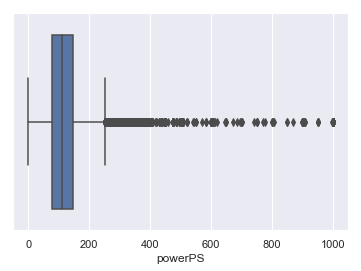

In [186]:
sns.boxplot(df5['powerPS'])

Text(0.5, 1.0, 'powerPS after capping Outliers')

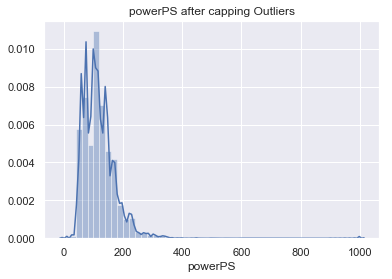

In [187]:
g = sns.distplot(df5['powerPS'])
g.set_title('powerPS after capping Outliers')

##### 4. Number of Days

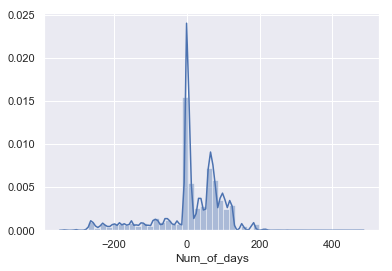

In [191]:
sns.distplot(df5.Num_of_days)

In [194]:
df5.describe()

,price,yearOfRegistration,powerPS,Num_of_days
count,206956.000000,206956.000000,206956.000000,206956.000000
mean,4476.867421,2002.675805,120.127602,11.228474
std,3964.216899,30.367158,58.781819,89.796135
min,251.000000,1000.000000,1.000000,-334.000000
25%,1390.000000,1999.000000,77.000000,0.000000
50%,3000.000000,2003.000000,110.000000,8.000000
75%,6500.000000,2007.000000,147.000000,70.000000
max,16700.000000,2018.000000,1000.000000,472.000000


##### Inference
* These values look quite okay now.

In [195]:
df5.dtypes

seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
kilometer               object
fuelType                object
notRepairedDamage       object
postalCode_bin        category
model_bin               object
brand_bin               object
Num_of_days              int32
dtype: object

In [196]:
#Changing kilometer to float
df5['kilometer'] = df5['kilometer'].astype('float')
df5.dtypes

seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
kilometer              float64
fuelType                object
notRepairedDamage       object
postalCode_bin        category
model_bin               object
brand_bin               object
Num_of_days              int32
dtype: object

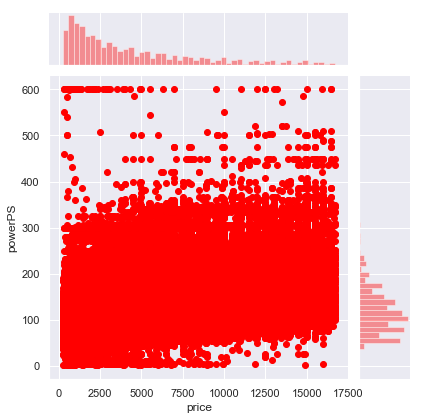

In [208]:
sns.jointplot(df5['price'],df5['powerPS'],color='red',kind='scatter')

##### Inference 
* We can see that even for powerPS > 600 the price is shown to be low which is strange. The highest price cars have powerPS below 600
* Lets cap powerPS of above 600 to 600

In [243]:
df5.loc[df5['powerPS'] > 600,'powerPS'] = 600
df5.loc[df5['powerPS'] > 600,'powerPS'].count()

0

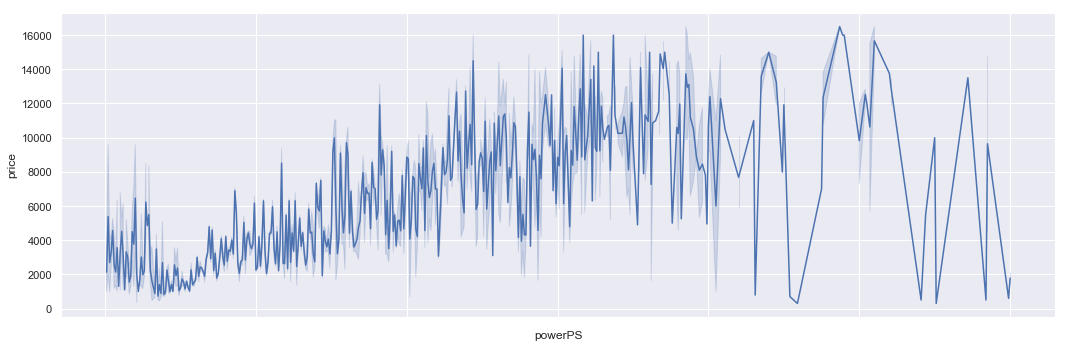

In [207]:
plt.figure(figsize=(15,5)) 
ax= sns.lineplot(y=df5['price'],x=df5['powerPS'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

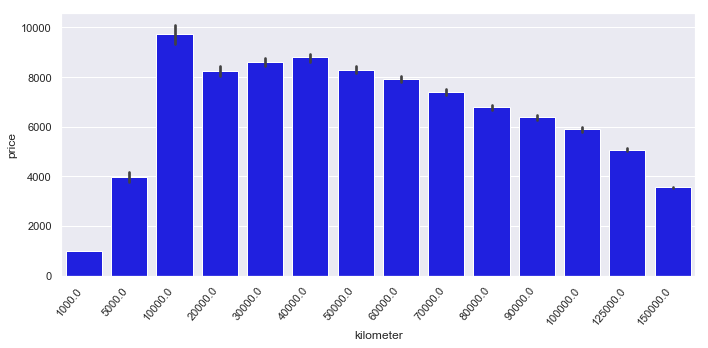

In [214]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(y=df5['price'],x=df5['kilometer'],color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

##### Inference 
* We can see not much can be concluded from this graph if kilometers increases, the price decreases

In [213]:
df5.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'fuelType',
       'notRepairedDamage', 'postalCode_bin', 'model_bin', 'brand_bin',
       'Num_of_days'],
      dtype='object')

## Model Building

### 1. Checking correlation

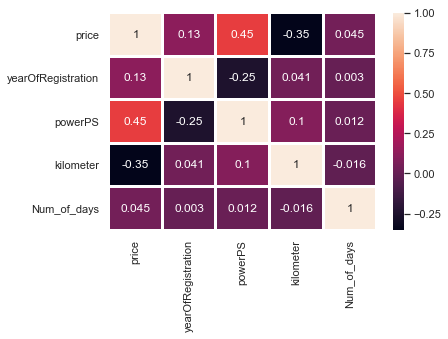

In [215]:
sns.heatmap(df5.corr(),annot=True,linecolor='white',linewidths=2)

In [218]:
df = df5._get_numeric_data()
df.head()

,price,yearOfRegistration,powerPS,kilometer,Num_of_days
2,9800.0,2004.0,163.0,125000.0,51
3,1500.0,2001.0,75.0,150000.0,0
4,3600.0,2008.0,69.0,90000.0,65
5,650.0,1995.0,102.0,150000.0,61
6,2200.0,2004.0,109.0,150000.0,121


In [220]:
df.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'Num_of_days'], dtype='object')

### 2. Dummy Variable For categorical columns

In [252]:
df5.kilometer = df5.kilometer.astype('float')

In [253]:
X = df5.loc[:,~df5.columns.isin(['price'])]
y = df5['price']
X_dummy = pd.get_dummies(X,drop_first=True,prefix_sep='_')
print(X_dummy.columns)
print(X_dummy.shape)

Index(['yearOfRegistration', 'powerPS', 'kilometer', 'Num_of_days',
       'abtest_test', 'vehicleType_andere', 'vehicleType_bus',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen',
       'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv',
       'gearbox_automatik', 'gearbox_manuell', 'fuelType_andere',
       'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg',
       'notRepairedDamage_ja', 'notRepairedDamage_nein', 'postalCode_bin_2',
       'postalCode_bin_3', 'postalCode_bin_4', 'postalCode_bin_5',
       'postalCode_bin_6', 'postalCode_bin_7', 'postalCode_bin_8',
       'postalCode_bin_9', 'postalCode_bin_10', 'model_bin_3er',
       'model_bin_5er', 'model_bin_a3', 'model_bin_a4', 'model_bin_a6',
       'model_bin_a_klasse', 'model_bin_andere', 'model_bin_astra',
       'model_bin_c_klasse', 'model_bin_corsa', 'model_bin_e_klasse',
       'model_bin_fiesta', 'model_bin_focus', 

In [254]:
df_new = pd.get_dummies(df5,drop_first=True,prefix_sep='_')

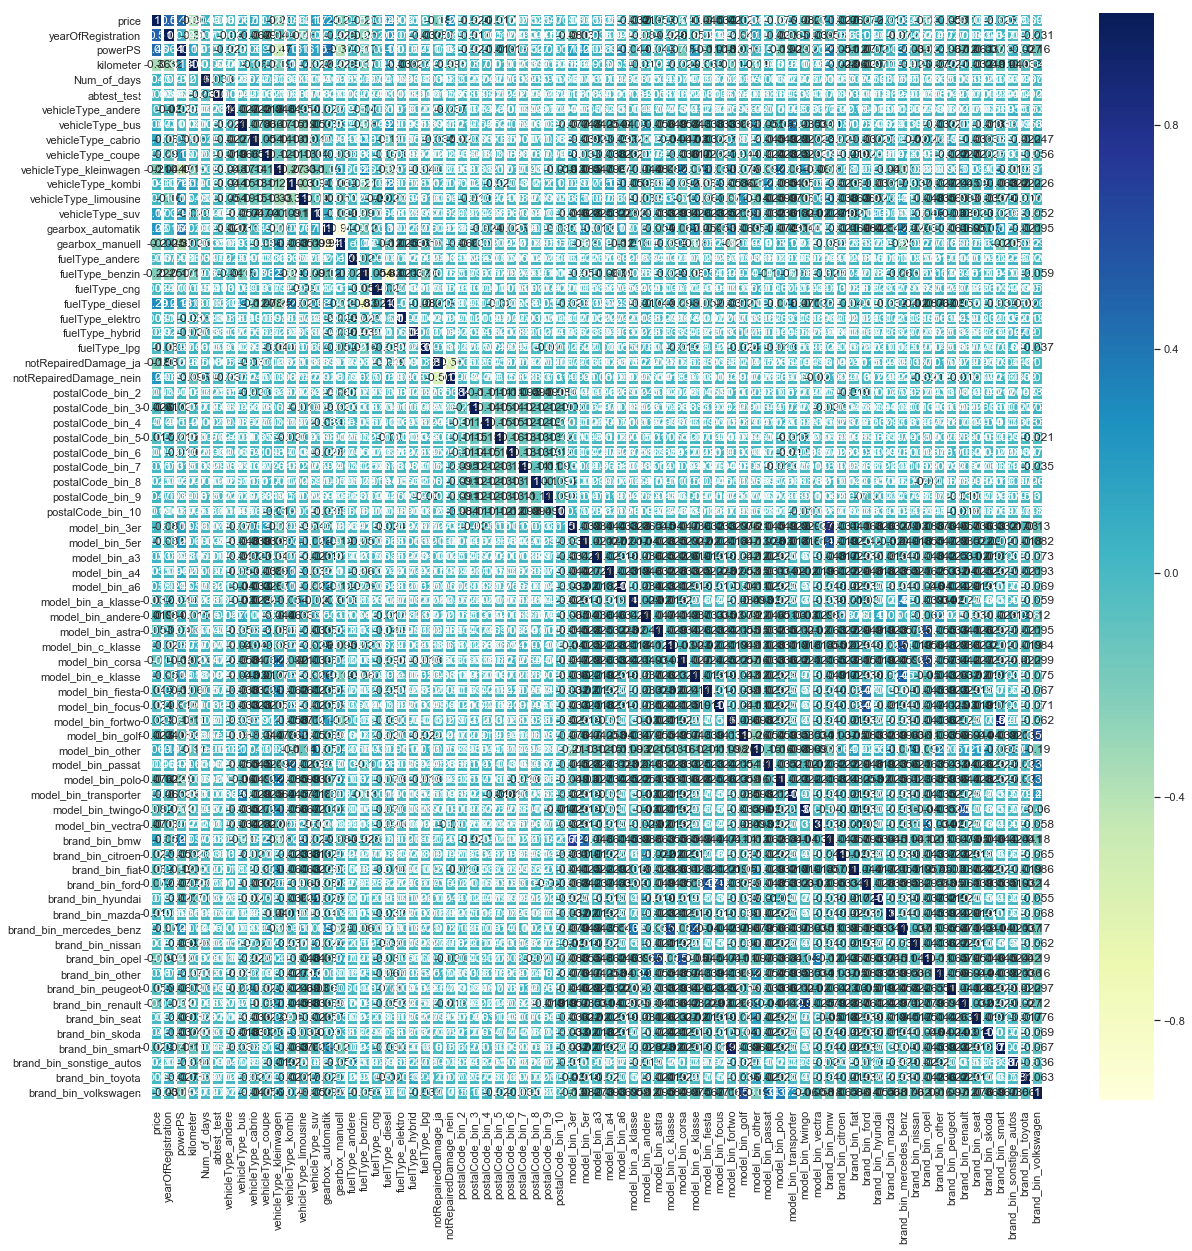

In [255]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,linecolor='white',linewidths=2, ax=ax,cmap='YlGnBu')
plt.show()

#### Checking Multicolinearity

In [258]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = "+".join(X_dummy.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('price ~' + features, df_new, return_type='dataframe')

In [259]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,211210.180216,Intercept
1,1.937440,yearOfRegistration
2,1.997455,powerPS
3,1.360821,kilometer
4,1.003009,Num_of_days
5,1.001452,abtest_test
6,1.211140,vehicleType_andere
7,3.242390,vehicleType_bus
8,2.600955,vehicleType_cabrio
9,2.227576,vehicleType_coupe


In [269]:
multi_colinear_df = vif[(vif['VIF Factor'] > 5)]

In [271]:
multicolinearity_features = [name for name in multi_colinear_df['features']]

In [274]:
del multicolinearity_features[0]

In [275]:
multicolinearity_features

['vehicleType_kleinwagen',
 'vehicleType_kombi',
 'vehicleType_limousine',
 'gearbox_automatik',
 'gearbox_manuell',
 'fuelType_diesel',
 'model_bin_3er',
 'model_bin_a4',
 'model_bin_andere',
 'model_bin_astra',
 'model_bin_corsa',
 'model_bin_fortwo',
 'model_bin_golf',
 'model_bin_other',
 'model_bin_passat',
 'model_bin_polo',
 'brand_bin_bmw',
 'brand_bin_ford',
 'brand_bin_mercedes_benz',
 'brand_bin_opel',
 'brand_bin_smart',
 'brand_bin_volkswagen']

In [276]:
X_dummy1 = X_dummy.drop(multicolinearity_features,axis=1)

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_dummy1, y, test_size=0.3, random_state=0)

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

Fewer attributes is desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain.

The objective of variable selection is three-fold: improving the prediction performance of the predictors, providing faster and more cost-effective predictors, and providing a better understanding of the underlying process that generated the data.

In [278]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train,y_train)
selected_feat= X_train.columns[(sel.get_support())]
print('The selected features are ',selected_feat)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


The selected features are  Index(['yearOfRegistration', 'powerPS', 'kilometer', 'Num_of_days'], dtype='object')


[2.45344666e-01 2.28566525e-01 1.77940159e-01 5.56267795e-03
 5.69674768e-03 1.63307324e-02 1.11564580e-03 5.95003841e-03
 1.22083598e-02 4.09101688e-03 2.36945072e-02 5.87540158e-03
 5.36575231e-03 5.87122403e-03 1.12490821e-03 2.06861492e-02
 3.71316805e-03 2.09591763e-03 4.30230020e-05 2.47782020e-03
 1.17613552e-04 8.94228489e-02 1.52115505e-04 2.88454779e-04
 9.46113012e-04 1.13325301e-03 1.44192401e-02 1.22231311e-02
 1.16753883e-03 7.24023110e-04 1.12632039e-03 4.73955556e-04
 4.88197933e-05 1.07744902e-04 1.36807027e-03 3.08404445e-03
 5.72960623e-04 8.52065104e-04 4.68580613e-04 5.78932955e-04
 9.13728115e-04 1.24140741e-04 1.91950625e-04 4.17992261e-04
 1.24498893e-03 9.86050098e-03 5.75981872e-03 6.35020068e-04
 1.05654233e-03 4.52688579e-03 1.82273597e-03 1.77261871e-03
 2.20450604e-03 1.05774102e-04 3.47164313e-04 1.13225566e-03
 1.58623191e-03 6.23677045e-04 1.95943093e-03 2.55992628e-04
 4.83867819e-04 1.49894964e-03 2.10937893e-04 1.45399369e-02
 1.12826358e-03 3.024553

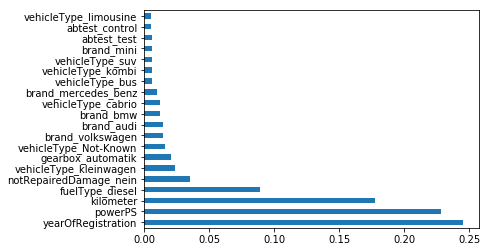

In [82]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor(n_estimators=20)
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_dummy.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [281]:
selected_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'Num_of_days']
selected_features_train = X_train.loc[:,X_train.columns.isin(selected_features)]
selected_features_train.shape
selected_features_test = X_test.loc[:,X_test.columns.isin(selected_features)]
selected_features_test.shape

(62087, 4)

In [96]:
scalar = StandardScaler()
selected_features_train = scalar.fit_transform(selected_features_train)
selected_features_test = scalar.transform(selected_features_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


### 3. Scaling Variables

In [279]:
#Using All features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.


### 4.Fitting a Linear Regression Model with all the features

In [280]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_train = linear_model.predict(X_train_scaled)
rmse_t = np.sqrt(mean_squared_error(y_train,y_pred_train))
r2_t = r2_score(y_train,y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)
print('Root mean squared error on Training Set', rmse_t)
print('R2 score on Train Set: ', r2_t)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

# adjusted_r_square Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)  Adjusted R2 requires number of independent variables as well
adjusted_r_square_test = 1-(((1-r2)*(len(y_test)-1))/(len(y_test)-X_test_scaled.shape[1]-1))
print('Adjusted R-squared Test: ', adjusted_r_square_test)

adjusted_r_square_train = 1-(((1-r2_t)*(len(y_train)-1))/(len(y_train)-X_train_scaled.shape[1]-1))
print('Adjusted R-squared Train: ', adjusted_r_square_train)

Root mean squared error on Training Set 2512.8982543189936
R2 score on Train Set:  0.5986743676965238
Root mean squared error on Testing Set 2499.6960265095877
R2 score on Testing Set:  0.6011550216474413
Adjusted R-squared Test:  0.6008335591270075
Adjusted R-squared Train:  0.5985358056281679


### Fitting a Linear Regression Model with selected features

In [282]:
linear_model = LinearRegression()
linear_model.fit(selected_features_train,y_train)
y_pred_linear = linear_model.predict(selected_features_test)
y_pred_train = linear_model.predict(selected_features_train)
rmse_t = np.sqrt(mean_squared_error(y_train,y_pred_train))
r2_t = r2_score(y_train,y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)
print('Root mean squared error on Training Set', rmse_t)
print('R2 score on Train Set: ', r2_t)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

# adjusted_r_square Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)  Adjusted R2 requires number of independent variables as well
adjusted_r_square_test = 1-(((1-r2)*(len(y_test)-1))/(len(y_test)-selected_features_test.shape[1]-1))
print('Adjusted R-squared: ', adjusted_r_square_test)

adjusted_r_square_train = 1-(((1-r2_t)*(len(y_train)-1))/(len(y_train)-selected_features_train.shape[1]-1))
print('Adjusted R-squared: ', adjusted_r_square_train)

Root mean squared error on Training Set 2777.0750044607917
R2 score on Train Set:  0.5098575600438704
Root mean squared error on Testing Set 2763.5622974993607
R2 score on Testing Set:  0.512507153830182
Adjusted R-squared:  0.512475744220558
Adjusted R-squared:  0.5098440261792814


Text(0.5, 1.0, 'Actual Vs Predicted')

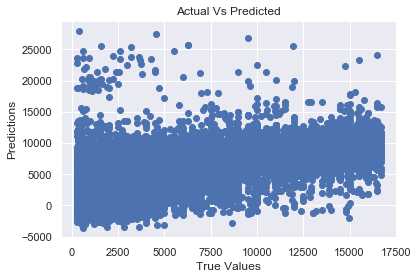

In [283]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Actual Vs Predicted')

In [313]:
residuals = (y_pred_linear-y_test)

In [314]:
residuals.head()

,price
0,2567.074277
1,-1475.880390
2,367.133700
3,-367.131019
4,-363.115778


In [315]:
residuals.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [316]:
residuals.head()

,price
0,2567.074277
1,-1475.880390
2,367.133700
3,-367.131019
4,-363.115778


In [317]:
residuals.shape

(62087, 1)

In [295]:
type(y_test)

pandas.core.frame.DataFrame

In [333]:
y_pred = pd.DataFrame.from_records(y_pred_linear)
y_pred.head()

,0
0,5767.074277
1,2814.119610
2,2867.133700
3,6631.868981
4,536.884222


In [337]:
y_pred.loc[2,0]

2867.133700322418

### Residual Plots

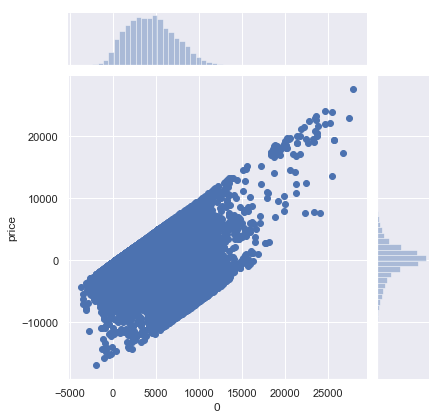

In [338]:
ax = sns.jointplot(y=residuals.loc[0:60000,'price'],x=y_pred.loc[0:60000,0])

This indicates a bad fit. 

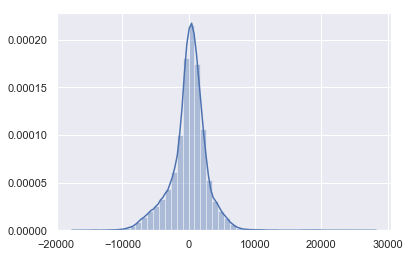

In [319]:
sns.distplot(residuals)

In [320]:
residuals.price.agg('mean')

-0.6755212740076859

### Non Linear Model - Using Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_dummy)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train_scaled, y_train)

y_pred_poly = pol_reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2 = r2_score(y_test,y_pred_poly)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)


### 5. Ridge Model

In [307]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=0) #Keeping any alpha and tol is not improving the performance so removed it
ridge_reg.fit(X_train_scaled,y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2499.6960937216827
R2 score on Testing Set:  0.6011550001990678


### 6. Lasso Model

In [308]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0,random_state=0)
lasso_reg.fit(X_train_scaled,y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2499.7474260327267
R2 score on Testing Set:  0.6011386191310997


In [310]:
import statsmodels.api as sm
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
from IPython.display import HTML, display

X1= X_dummy1.copy()
X['intercept'] = np.ones((X.shape[0],),dtype=int) #Adding an intercept column of value 1 - constant (Beta -0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=0)

ols_model = sm.OLS(y_train1,X_train1).fit()
ols_model_summary = ols_model.summary()
HTML(ols_model_summary.as_html())

### 7. OLS Model

In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
from IPython.display import HTML, display

X1= X_dummy.copy()
X['intercept'] = np.ones((X.shape[0],),dtype=int) #Adding an intercept column of value 1 - constant (Beta -0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=0)

ols_model = sm.OLS(y_train1,X_train1).fit()
ols_model_summary = ols_model.summary()
HTML(ols_model_summary.as_html())

### 6. XGBoost

Best Parameters for XGBoost found empirically  

GENERAL PARAMETERS  
1. *booster* = gbtree(default), type of base learners  
2. *silent* = 0(default), whether we want messages from xgboost, 0 for yes  
3. *nthread* =  do nothing, will automatically pick all cores available  

BOOSTER PARAMETERS for tree boosters as that is the best  
1. *eta* = **default 0.3, empirically between 0.01 and 0.2**, like learning rate in GBM  
2. *min_child_weight* = **default 1** sum of weights in each child node or leaf. very high leads to underfitting. **to be found using CrossValidation**    
3. *max_depth* = depth of tree learners, **default 6, emirically between 3 to 10**  
4. *max_leaf_nodes* = set by max_depth as it is equal to 2^max_depth  
5. *gamma* = default 0, minimum loss reduction required to make a split  
6. *subsample* = fraction of observation to be take for each learner tree. **default 1, empirically between 0.5 and 1**.  
7. *colsample_bytree* = fraction of columns in sample of training data from learner trees, **default=1, empirically 
between 0.5 and 1**  
8. *lambda* = L2 or Ridge Regularization, **default 1**   
9. *alpha* = L1 or Lasso Regularization, to be used when there are a lot of dimensions or features , **default 0**  
10. *scale_pos_weight* = **default=1**, A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence  

 
LEARNING TASK PARAMETERS used to define the optimization objective  
1. *objective* = default=reg:linear, This defines the loss function to be minimized. Mostly used values are  
   **binary:logistic** –logistic regression for binary classification, returns predicted probability (not class)  
   **multi:softmax** –multiclass classification using the softmax objective, returns predicted class (not probabilities), you also need to set an additional num_class (number of classes) parameter defining the number of unique classes  
   **multi:softprob** –same as softmax, but returns predicted probability of each data point belonging to each class.  
   
2. *eval_metric* = metric to be used for validation data. default values are **rmse for regression** and **error for classification**.  
3. *num_boosting_rounds* = no. of trees or boosting rounds, **find using CrossValidation**  




**General Approach for Parameter Tuning**  

We will use an approach similar to that of GBM here. The various steps to be performed are:  

1. Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems.
    a. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.  
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.  
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.  
4. Lower the learning rate and decide the optimal parameters .  


**Data Preparation for xgboost**
1. no categorical variable  
2. no need to handle missing values are xgboost is capable of handling them  

In [101]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# separating independent features and dependent or target feature
X = df5.loc[:,~df5.columns.isin(['price'])]
y = df5['price']

# encoding using ONE HOT ENCODER
X_dummy = pd.get_dummies(X,drop_first=True,prefix_sep='_')


# convert the dataset into an optimized data structure 
# called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.
data_dmatrix = xgb.DMatrix(data=X_dummy,label=y)


# creating train and test data
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=123)

#### Basic XGBRegressor with any empirical parameter values

In [102]:
# XGBRegressor for Regression
xg_reg_basic = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [103]:
#Fit the regressor to the training set and make predictions on the test set using 
#the familiar .fit() and .predict() methods.
xg_reg_basic.fit(X_train,y_train,eval_metric="rmse")

preds = xg_reg_basic.predict(X_test)

In [104]:
# calculation RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print('R-squared: ', r2_score(y_test,preds))

RMSE: 3338.227251
R-squared:  0.30293990863577036


##### k-fold Cross Validation using XGBoost  using xgb.cv() method  to find n_estimators
what does xgb.cv() do?  
it does boosting rounds specified by num_boost_round but limited by early_stopping_rounds. It then gives results(according to specified metrics) for each boosting round (1 round = 1 tree in boosting) and outputs them in a dataframe.

following are the options in xgb.cv()  

1. num_boost_round: denotes the number of trees you build (analogous to n_estimators)  
2. metrics: tells the evaluation metrics to be watched during CV  
3. as_pandas: to return the results in a pandas DataFrame.  
4. early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.  
5. seed: for reproducibility of results.  


dtain = all the data we have as we are using cross validation  
params = all the parameters for XGBRegressor object  
n_fold = k in k-folds cross validation  

In [105]:
# set 1 of basic parameters set empirically
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [107]:
import datetime
# set 2 of basic parameters set empirically
#param_grid = {
#    'learning_rate': 0.3,
#    'max_depth': 5,
#    'min_child_weight': 6,
#    'subsample': 0.8,
#    'colsample_bytree': 0.8,
#    'objective': 'reg:linear',
#    'seed': 27
#}

print("Start of xgv.cv  {0}".format(datetime.datetime.now()))
cv_results2 = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=200,early_stopping_rounds=50,metrics="rmse", seed=123)
print("End of xgv.cv  {0}".format(datetime.datetime.now()))

Start of xgv.cv  2019-05-16 16:13:20.759951
End of xgv.cv  2019-05-16 16:16:36.255468


In [108]:
cv_results2.tail()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
195,1614.794637,2.523049,1585.432047,3.065076
196,1613.950847,1.967897,1584.397420,3.707531
197,1613.566895,2.062132,1583.776856,3.550682
198,1613.338908,2.141752,1583.360026,3.445277
199,1612.993734,2.454535,1582.961955,3.134155


**plotting train-rmse-mean and test-rmse-mean from cv_results to see when we are starting to overfit**

In [109]:
temp=cv_results2.copy()
temp=temp.reset_index()
temp=temp.rename(columns={'index':'num_boosting_round or n_estimators'})

In [110]:
temp.head()

,num_boosting_round or n_estimators,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0,5600.007813,6.291290,5600.005208,2.408840
1,1,5287.146973,5.154359,5286.935384,9.020497
2,2,4887.162435,2.497358,4886.892090,7.112853
3,3,4575.640951,49.121161,4574.625000,58.183089
4,4,4350.731771,58.778638,4349.418945,69.581931


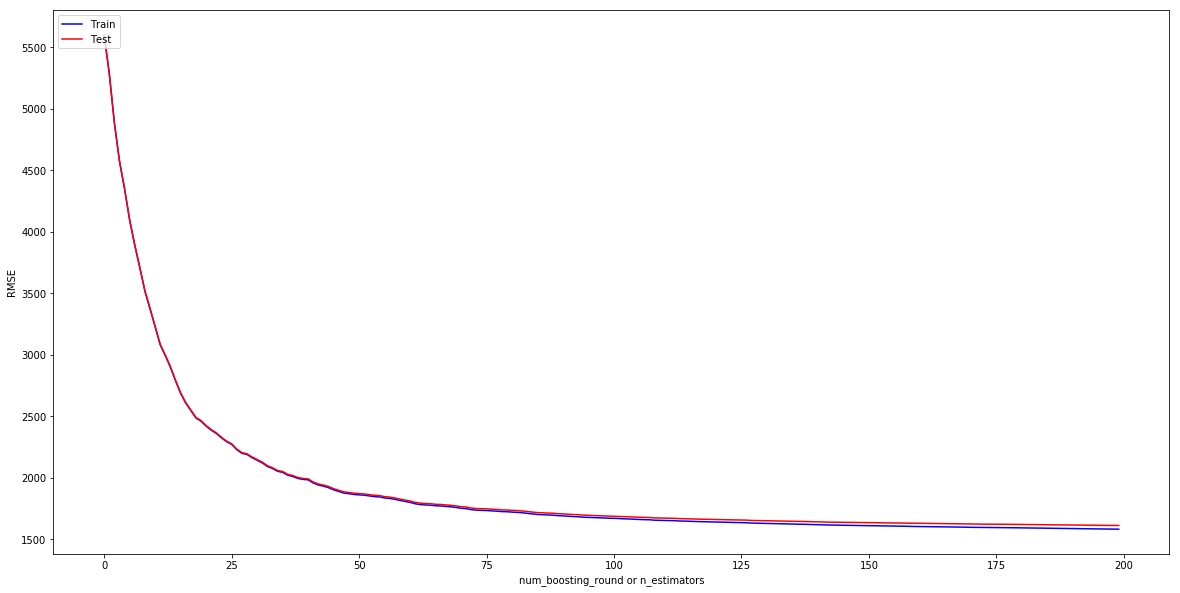

In [111]:
plt.figure(figsize=(20,10))
plt.plot(temp['num_boosting_round or n_estimators'], temp['train-rmse-mean'], 'b', label='Train RMSE')
plt.plot(temp['num_boosting_round or n_estimators'], temp['test-rmse-mean'], 'r', label='Test RMSE')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('RMSE')
plt.xlabel('num_boosting_round or n_estimators')
plt.show()

**Observation**: as we can see, after **n_estimators = around 125**, the decrease in RMSE is not much.  
Also, there is no overfitting as RMSE on train and test data set is decreasing  

*why GridSearchCV is not effective method for finding n_estimators?*   
because RMSE is still decreasing but very slowly. SO GridSearchCV will give n_estimators for lowest RMSE which might not be very efficient. For n_estimator range(0:2000), GridSearchCV will give 2000 as the best n_estimator.

#### XGBRegressor with tuned n_estimators

In [112]:
param_tuned = {
    'learning_rate': 0.3,
    'max_depth': 5,
    'min_child_weight': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'seed': 27,
    'n_estimators': 125
}
xg_reg_tuned = xgb.XGBRegressor(params=param_tuned)

In [113]:
# fitting on train data
xg_reg_tuned.fit(X_train,y_train,eval_metric="rmse")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear',
       params={'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 125, 'objective': 'reg:linear', 'learning_rate': 0.3, 'seed': 27, 'min_child_weight': 6},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [114]:
# predicting on test data
preds_tuned = xg_reg_tuned.predict(X_test)

In [115]:
print('On TEST DATA')
# calculation RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_tuned))
print("RMSE: %f" % (rmse))

r_square=r2_score(y_test,preds_tuned)
print('R-squared: ', r_square)

# adjusted_r_square
adjusted_r_square = 1-(((1-r_square)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R-squared: ', adjusted_r_square)

On TEST DATA
RMSE: 1776.364799
R-squared:  0.8026201840132103
Adjusted R-squared:  0.8023073573616055


**Observation**: even after taking empirically chosen parameters and tuning only one parameter(n_estimators), xgboost gave a much better result.  

We can furthur tune the parameters using this value of n_estimators and using GridSearchCV to tune tree parameters. Eventually we can try to reduce learning rate too.

In [120]:
# plotting feature importance according the xgboost model
xgb.plot_importance(xg_reg_tuned)
#plt.figure(figsize=(100,100))
#plt.rcParams['figure.figsize'] = [200, 205]
#plt.show()